# EDA Quiz

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats
from collections import Counter

# import pandas_profiling
# from pandas_profiling import ProfileReport

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("amestrain.csv")

In [3]:
df

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,238.00,Unf,0.00,618.00,856.00,GasA,TA,Y,SBrkr,856,0,0,1.00,0.00,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.00,Unf,2.00,399.00,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.00,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.00,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.00,ALQ,393.00,104.00,1049.00,GasA,TA,Y,SBrkr,1049,0,0,1.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.00,Fin,1.00,266.00,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.00,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,BrkTil,TA,TA,No,ALQ,737.00,Unf,0.00,100.00,837.00,GasA,Ex,Y,SBrkr,1001,0,0,0.00,0.00,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.00,Unf,1.00,216.00,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.00,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.00,Unf,0.00,405.00,405.00,GasA,Gd,Y,SBrkr,717,322,0,0.00,0.00,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.00,Unf,1.00,281.00,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.00,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,TA,No,GLQ,643.00,Unf,0.00,167.00,810.00,GasA,Ex,Y,SBrkr,810,855,0,1.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.00,Fin,2.00,528.00,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,907290250,848,145000,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,662.00,Unf,0.00,186.00,848.00,GasA,Ex,Y,SBrkr,848,0,0,1.00,0.00,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2004.00,RFn,2.00,420.00,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
996,528480150,1576,197000,60,FV,65.00,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,Gd,No,Unf,0.00,Unf,0.00,770.00,770.00,GasA,Ex,Y,SBrkr,778,798,0,0.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2006.00,RFn,2.00,614.00,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial
997,534427010,1728,84900,90,RL,98.00,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.00,TA,TA,CBlock,TA,TA,No,BLQ,1500.00,Unf,0.00,228.00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              1000 non-null   int64  
 1   area             1000 non-null   int64  
 2   price            1000 non-null   int64  
 3   MS.SubClass      1000 non-null   int64  
 4   MS.Zoning        1000 non-null   object 
 5   Lot.Frontage     833 non-null    float64
 6   Lot.Area         1000 non-null   int64  
 7   Street           1000 non-null   object 
 8   Alley            67 non-null     object 
 9   Lot.Shape        1000 non-null   object 
 10  Land.Contour     1000 non-null   object 
 11  Utilities        1000 non-null   object 
 12  Lot.Config       1000 non-null   object 
 13  Land.Slope       1000 non-null   object 
 14  Neighborhood     1000 non-null   object 
 15  Condition.1      1000 non-null   object 
 16  Condition.2      1000 non-null   object 
 17  Bldg.Type      

In [5]:
df.describe()

,PID,area,price,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
count,1000.00,1000.00,1000.00,1000.00,833.00,1000.00,1000.00,1000.00,1000.00,1000.00,993.00,999.00,999.00,999.00,999.00,1000.00,1000.00,1000.00,999.00,999.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,952.00,999.00,999.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,705924438.80,1476.62,181190.08,57.15,69.21,10352.41,6.09,5.56,1972.20,1984.34,104.13,464.15,48.07,546.99,1059.20,1157.09,315.20,4.32,0.45,0.06,1.54,0.38,2.81,1.04,6.34,0.60,1977.92,1.77,475.41,93.84,48.93,23.48,3.12,14.77,1.46,45.81,6.24,2007.77
std,188569821.87,505.17,81909.79,43.02,24.29,9827.84,1.41,1.09,29.64,20.56,184.41,453.55,167.03,428.08,426.33,385.46,424.28,48.89,0.53,0.25,0.54,0.50,0.83,0.20,1.58,0.65,25.27,0.76,218.78,123.32,69.59,60.59,29.22,53.96,30.48,560.29,2.75,1.30
min,526302030.00,334.00,12789.00,20.00,21.00,1470.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,528477042.50,1092.00,129762.50,20.00,57.00,7314.00,5.00,5.00,1955.00,1966.00,0.00,0.00,0.00,223.50,797.50,876.25,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,312.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,535425070.00,1411.00,159467.00,50.00,69.00,9317.00,6.00,5.00,1975.00,1992.50,0.00,400.00,0.00,461.00,998.00,1080.50,0.00,0.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1979.00,2.00,480.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,907145180.00,1743.25,213000.00,70.00,80.00,11649.75,7.00,6.00,2001.00,2004.00,160.00,773.00,0.00,783.00,1301.00,1376.25,688.25,0.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,74.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,1007100110.00,4676.00,615000.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1290.00,2260.00,1526.00,2336.00,3138.00,3138.00,1836.00,1064.00,3.00,2.00,4.00,2.00,6.00,2.00,13.00,4.00,2010.00,5.00,1390.00,857.00,742.00,432.00,508.00,440.00,800.00,15500.00,12.00,2010.00


In [6]:
df.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

### 1. Which of the following are the three variables with the highest number of missing observations?

In [7]:
df.isnull().sum().sort_values(ascending=False).head(10)

Pool.QC          997
Misc.Feature     971
Alley            933
Fence            798
Fireplace.Qu     491
Lot.Frontage     167
Garage.Yr.Blt     48
Garage.Qual       48
Garage.Cond       48
Garage.Finish     48
dtype: int64

### 2. How many categorical variables are coded in R as having type `int`? 

In [8]:
df.dtypes.sort_values()

PID                 int64
X1st.Flr.SF         int64
X2nd.Flr.SF         int64
Low.Qual.Fin.SF     int64
Full.Bath           int64
                    ...  
Kitchen.Qual       object
House.Style        object
Functional         object
BsmtFin.Type.1     object
Sale.Condition     object
Length: 81, dtype: object

In [9]:
df.dtypes.value_counts()

object     43
int64      27
float64    11
dtype: int64

In [10]:
df.select_dtypes(include='int64').keys()

Index(['PID', 'area', 'price', 'MS.SubClass', 'Lot.Area', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold', 'Yr.Sold'], dtype='object')

### 3. In terms of price, which neighborhood has the highest standard deviation?

In [11]:
df.groupby(["Neighborhood"])["price"].std().sort_values().tail(5)

Neighborhood
Crawfor    71267.56
Veenker    72545.41
Timber     84029.57
NridgHt   105088.90
StoneBr   123459.10
Name: price, dtype: float64

### 4. Using scatter plots or other graphical displays, which of the following variables appears to be the best single predictor of price?

### Regression plot

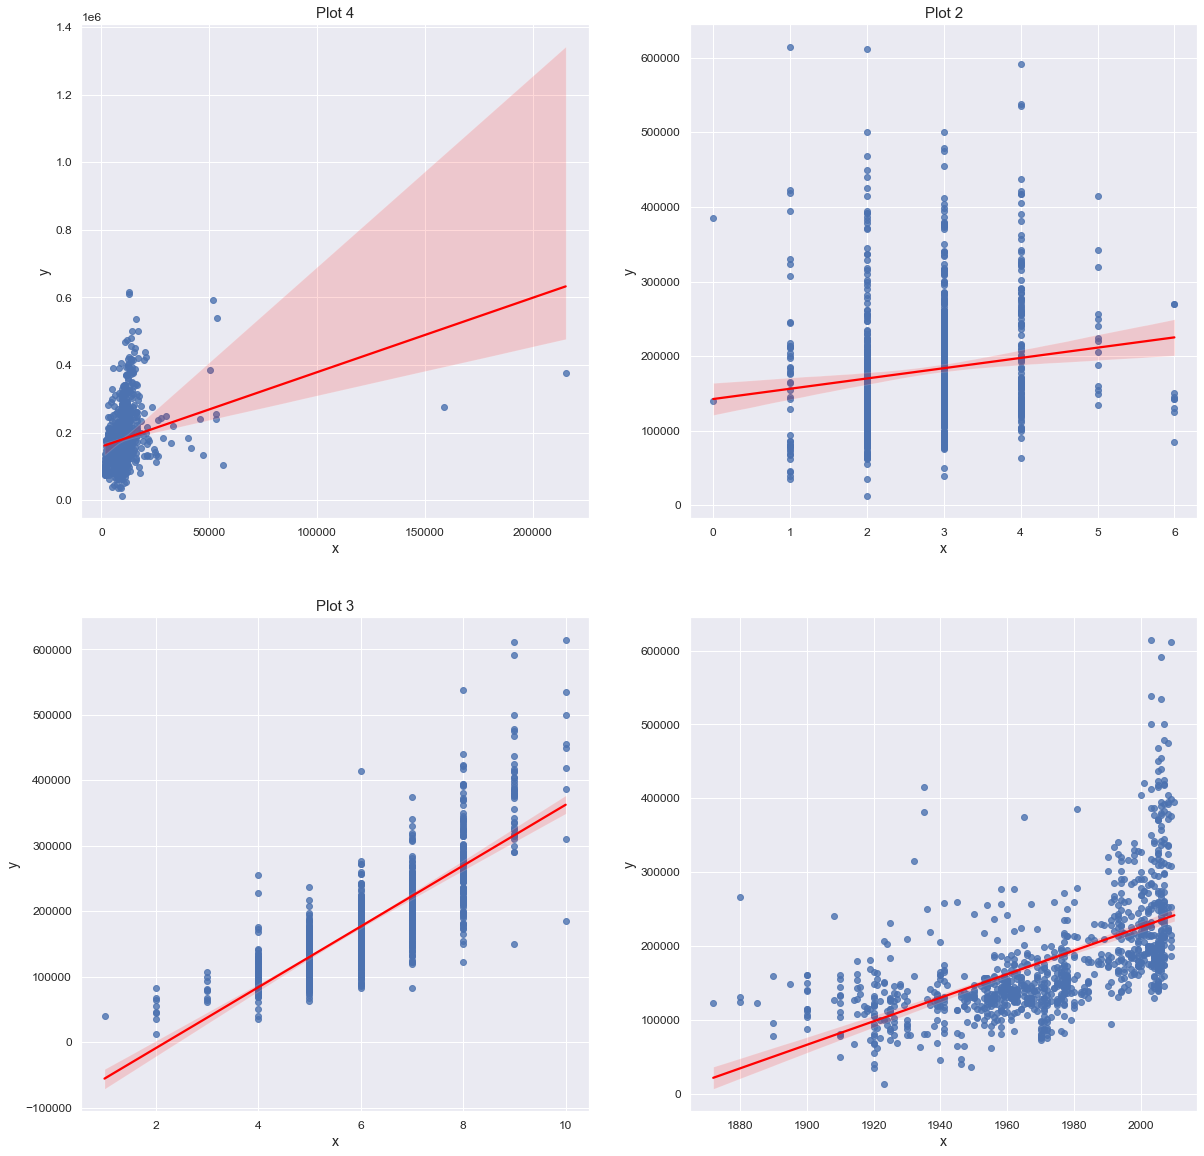

In [12]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=df["Lot.Area"], y=df.price, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=df["Bedroom.AbvGr"], y=df.price, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=df["Overall.Qual"], y=df.price, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=df["Year.Built"], y=df.price, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax1.set_title("Plot 4", size=15)

plt.show()

### 5. Suppose you are examining the relationship between `price` and `area`.  Which of the following variable transformations makes the relationship appear to be the most linear?

<AxesSubplot:>

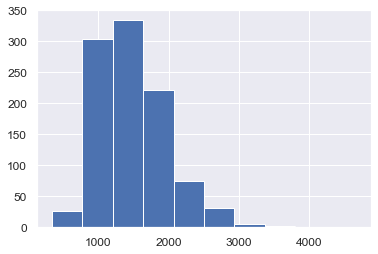

In [13]:
df["area"].hist()

<AxesSubplot:>

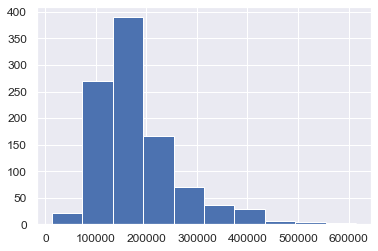

In [14]:
df["price"].hist()

### 6. Suppose that your prior for the proportion of houses that have at least one garage is Beta(9, 1).  What is your posterior? Assume a beta-binomial model for this proportion.

### 7. Which of the following statements is true about the dataset?

In [15]:
df["Year.Built"].value_counts()

2005    49
2006    48
2007    38
2004    37
1977    27
        ..
1934     1
2010     1
1885     1
1942     1
1895     1
Name: Year.Built, Length: 102, dtype: int64

In [16]:
df[df["Year.Built"] > 1999].count()

PID               272
area              272
price             272
MS.SubClass       272
MS.Zoning         272
                 ... 
Misc.Val          272
Mo.Sold           272
Yr.Sold           272
Sale.Type         272
Sale.Condition    272
Length: 81, dtype: int64

In [17]:
df["price"].describe()

count     1000.00
mean    181190.08
std      81909.79
min      12789.00
25%     129762.50
50%     159467.00
75%     213000.00
max     615000.00
Name: price, dtype: float64

In [18]:
df.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

In [19]:
df["BsmtFin.Type.1"].value_counts(dropna=False)

GLQ    294
Unf    279
ALQ    163
Rec    107
BLQ     87
LwQ     48
NaN     22
Name: BsmtFin.Type.1, dtype: int64

In [20]:
df["Street"].value_counts()

Pave    997
Grvl      3
Name: Street, dtype: int64

### 8. Test, at the $\alpha = 0.05$ level, whether homes with a garage have larger square footage than those without a garage.

In [21]:
df["Garage.Type"].value_counts(dropna=False)

Attchd     610
Detchd     266
BuiltIn     56
NaN         46
Basment     11
2Types      10
CarPort      1
Name: Garage.Type, dtype: int64

In [22]:
have_garage = df[df["Garage.Type"] != np.nan]

In [23]:
have_garage["Garage.Type"].value_counts()

Attchd     610
Detchd     266
BuiltIn     56
Basment     11
2Types      10
CarPort      1
Name: Garage.Type, dtype: int64

In [24]:
no_garage = df[df["Garage.Type"] == np.nan]

In [25]:
#no_garage["Garage.Type"].null().count()

In [26]:
df["Lot.Area"].mean()

10352.406

## T-Test

### One Sample T-Test

In [27]:
t, p = scipy.stats.ttest_1samp(a=no_garage["Lot.Area"], popmean=10352.406)

In [28]:
print("T-test value is: ", t)
print("p-value value is: ", p)

T-test value is:  nan
p-value value is:  nan


### Two Samples T-Test

In [29]:
t, p = scipy.stats.ttest_ind(a=have_garage["Lot.Area"],b=no_garage["Lot.Area"], equal_var = True)

In [30]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  nan
p-value value is:  nan


### 12. How many neighborhoods consist of only single-family homes? (e.g. `Bldg.Type` = `1Fam`)

In [31]:
df["Bldg.Type"].value_counts()

1Fam      823
TwnhsE     84
Twnhs      38
Duplex     35
2fmCon     20
Name: Bldg.Type, dtype: int64

In [32]:
neighbourhood = df[df["Bldg.Type"] == "1Fam"]

In [33]:
neighbourhood["Neighborhood"].value_counts()

NAmes      143
CollgCr     82
OldTown     58
Sawyer      56
Gilbert     48
Edwards     48
Somerst     47
NridgHt     40
BrkSide     40
NWAmes      40
SawyerW     36
Mitchel     35
IDOTRR      33
NoRidge     28
Crawfor     25
Timber      19
ClearCr     13
StoneBr     12
SWISU       11
Veenker      7
Blmngtn      2
Name: Neighborhood, dtype: int64

### 13. Using color, different plotting symbols, conditioning plots, etc., does there appear to be an association between $\log$(`area`) and the number of bedrooms above ground (`Bedroom.AbvGr`)? 

In [34]:
df["log_area"] = np.log(df["Lot.Area"])

In [35]:
df.head()

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,log_area
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,238.00,Unf,0.00,618.00,856.00,GasA,TA,Y,SBrkr,856,0,0,1.00,0.00,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.00,Unf,2.00,399.00,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,8.97
1,905476230,1049,139500,120,RL,42.00,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.00,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.00,ALQ,393.00,104.00,1049.00,GasA,TA,Y,SBrkr,1049,0,0,1.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.00,Fin,1.00,266.00,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,8.35
2,911128020,1001,124900,30,C (all),60.00,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,BrkTil,TA,TA,No,ALQ,737.00,Unf,0.00,100.00,837.00,GasA,Ex,Y,SBrkr,1001,0,0,0.00,0.00,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.00,Unf,1.00,216.00,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,8.71
3,535377150,1039,114000,70,RL,80.00,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.00,Unf,0.00,405.00,405.00,GasA,Gd,Y,SBrkr,717,322,0,0.00,0.00,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.00,Unf,1.00,281.00,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,9.01
4,534177230,1665,227000,60,RL,70.00,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,TA,No,GLQ,643.00,Unf,0.00,167.00,810.00,GasA,Ex,Y,SBrkr,810,855,0,1.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.00,Fin,2.00,528.00,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,9.04


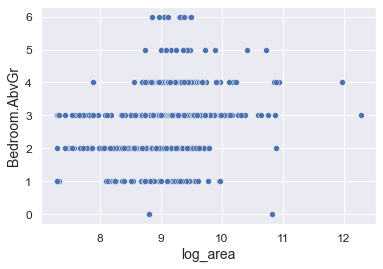

In [36]:
sns.scatterplot(x=df["log_area"], y=df["Bedroom.AbvGr"], data=df)
plt.show()

### 14. Of the people who have unfinished basements, what is the average square footage of the unfinished basement?

In [37]:
df["BsmtFin.Type.1"].value_counts()

GLQ    294
Unf    279
ALQ    163
Rec    107
BLQ     87
LwQ     48
Name: BsmtFin.Type.1, dtype: int64

In [38]:
unfinished = df[df["BsmtFin.Type.1"] == "Unf"]

In [39]:
unfinished["Bsmt.Unf.SF"].mean()

951.1935483870968

In [40]:
---------------------

SyntaxError: invalid syntax (Temp/ipykernel_4968/204684330.py, line 1)

## Data Visualization

### Univariate Data Exploration

In [ ]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
fig.suptitle('Main Title')


sns.barplot(x="", y="", data=df, ax=ax[0])
ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)

sns.barplot(x="", y="", data=df, ax=ax[1])
ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)

sns.barplot(x="", y="", data=df, ax=ax[2])
ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)

sns.barplot(x="", y="", data=df, ax=ax[3])
ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)

plt.show()

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Main Title')

sns.countplot(x="", data=df, hue=, ax=ax[0])
ax[0].set_title('Title of the first chart')
ax[0].tick_params('x', labelrotation=45)

sns.countplot(x="", data=df, hue=, ax=ax[1])
ax[1].set_title('Title of the second chart')
ax[1].tick_params('x', labelrotation=45)

plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Main Title', y=0.5)

sns.countplot(x="", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.countplot(x="", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)


sns.countplot(x="", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)


plt.show()

In [ ]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,2)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,3)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,4)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,5)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,6)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,7)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,8)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,9)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,10)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,11)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,12)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,13)
plt.title("", size=20)
sns.relplot()

plt.subplot(7,2,14)
plt.title("", size=20)
sns.relplot()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='', hue = '', row = '',
            kind='count', data=ratings_df,
            height = 3, aspect = 1)

g.set_xlabels("")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

## Time-Series Analysis

In [ ]:
timeseries = df[['date','extraction','month', 'day']]

In [ ]:
timeseries

In [ ]:
timeseries.info()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

### Pairplots

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))
plt.show()

## Bivariate Data Exploration

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

### FacetGrid

In [ ]:
g = sns.FacetGrid(data=df, col="column_name", height=3, aspect=1)
g.map(plt.scatter, "numeric", "numeric")
g.add_legend()
plt.show()

## Geospatial Analysis

In [ ]:
mapping = usa_stores[['City','Latitude','Longtitude','Sentiment','Revenue']]
mapping

In [ ]:
m = folium.Map(location=[37.090240,-95.712891], zoom_start=5)
m

In [ ]:
map_df = pd.DataFrame(mapping.groupby(["City","Latitude","Longtitude"]).mean())
map_df

In [ ]:
folium.Marker(location=[33.76,-84.42], popup="Atlanta", tooltip="Sentiment=83.69, Revenue=292.57").add_to(m)
folium.Marker(location=[36.23,-115.27], popup="Las Vegas", tooltip="Sentiment=83.72, Revenue=187.40").add_to(m)
folium.Marker(location=[34.11,-118.41], popup="Los Angeles", tooltip="Sentiment=83.75, Revenue=255.95").add_to(m)
folium.Marker(location=[40.69,-73.92], popup="New York", tooltip="Sentiment=83.71, Revenue=328.38").add_to(m)
folium.Marker(location=[32.83,-117.12], popup="San Diego", tooltip="Sentiment=83.70, Revenue=272.93").add_to(m)

m

In [ ]:
m.save("filename.html")

In [ ]:
state_geo = f"malaysia.geojson"

In [ ]:
map2 = folium.Map(location=[4.210484,108.975766], zoom_start=6)

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1.  `geo_data`, which is the GeoJSON file.
2.  `data`, which is the dataframe containing the data.
3.  `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [ ]:
folium.Choropleth(geo_data=state_geo, name="choropleth").add_to(map2)

### Correlation

In [ ]:
df.corr()

In [ ]:
df.corr()["target"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

## T-Test

### One Sample T-Test

In [ ]:
t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [ ]:
print("T-test value is: ", t)
print("p-value value is: ", p)

### Two Samples T-Test

In [ ]:
t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = True/False)

In [ ]:
print("T-test value is: ",t)
print("p-value value is: ",p)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


### One Way ANOVA

In [ ]:
mod = ols('len~supp', data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod,typ=2)

In [ ]:
aov_table

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Two-way ANOVA

In [ ]:
mod1 = ols('len~supp+dose', data=df).fit()

In [ ]:
aov1 = sm.stats.anova_lm(mod1,typ=2)

In [ ]:
aov1

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [ ]:
#Create a Cross-tab table

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
print(f"Chi score is", chi_square[0])

In [ ]:
print("P-value is", chi_square[1])

In [ ]:
print("Degrees of freedom is", chi_square[2])

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [ ]:
pearson_correlation = scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

In [ ]:
print("Pearson's correlation coefficient is", pearson_correlation[0])

In [ ]:
print("P-value is", pearson_correlation[1])

## Data Preprocessing

### Feature Engineering

### Equal Width Discretization

In [ ]:
df["demoscorecat"] = df["polityscore"] #Make a copy

In [ ]:
disc = EqualWidthDiscretiser(bins=4, variables=['demoscorecat'], return_object=True)

In [ ]:
disc

In [ ]:
disc.fit(df)

In [ ]:
disc.binner_dict_

In [ ]:
df2 = disc.fit_transform(df)
df2.head()

In [ ]:
df2["demoscorecat"].value_counts().plot.bar()
plt.show()

### Equal Frequency Discretizer

In [ ]:
df2["co2cat"] = df2["co2emissions"] #Make a copy

In [ ]:
disc = EqualFrequencyDiscretiser(q=5, variables=['co2cat'])

In [ ]:
disc.fit(df2)

In [ ]:
disc.binner_dict_

In [ ]:
df3 = disc.transform(df2)
df3.head()

In [ ]:
df3["co2cat"].value_counts().plot.bar()
plt.show()

### Discretisation + OrdinalEncoder

In [ ]:
### Choose which columns to be discretized first
df3["incomecat"] = df3["incomeperperson"] #Make a copy
df3["alccat"] = df3["alcconsumption"] #Make a copy

In [ ]:
df3.head()

In [ ]:
# to encode variables we need them returned as objects for feature-engine
disc = EqualFrequencyDiscretiser(q=5, variables=['incomecat','alccat'], return_object=True)

In [ ]:
df4 = disc.fit_transform(df3)
df4.head()

In [ ]:
df4["incomecat"].value_counts().plot.bar()
df4["alccat"].value_counts().plot.bar()
plt.show()

In [ ]:
# Set y = target variable, and x = independant variables (both must be objects)

In [ ]:
df5 = df4[['demoscorecat','incomecat', 'alccat']]
df5.head()

In [ ]:
df5.dtypes

In [ ]:
df5.groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
df5.groupby('alccat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
enc = OrdinalEncoder(encoding_method = 'ordered')

In [ ]:
X = df5[['incomecat', 'alccat']]

In [ ]:
y = df5['demoscorecat']

In [ ]:
enc.fit(X, y)

In [ ]:
X_transform = enc.transform(X)

In [ ]:
enc.encoder_dict_

In [ ]:
X_transform  # Transformed for monotonic relationship

In [ ]:
pd.concat([X_transform, y], axis=1)

In [ ]:
pd.concat([X_transform, y], axis=1).groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

### Discretisation with Decision Trees

In [ ]:
df4['electricat'] = df4['relectricperperson'] #Make a copy

In [ ]:
df4.head()

In [ ]:
# Let y = demoscorecat, and x = electricat, breastcancerper100th

df6 = df4[['breastcancerper100th','electricat','demoscorecat']]
df6.head()

In [ ]:
X = df6[['breastcancerper100th','electricat']]
y = df6['demoscorecat']

In [ ]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=5, scoring='accuracy', variables=['electricat'], regression=False,
                                  param_grid={'max_depth':[1,2,3], 'min_samples_leaf':[2,4,6]})

In [ ]:
treeDisc.fit(X,y)

In [ ]:
treeDisc.binner_dict_['electricat'].best_params_

In [ ]:
treeDisc.scores_dict_['electricat']

In [ ]:
X_transform = treeDisc.transform(X) #Only electricat column

In [ ]:
X_transform

In [ ]:
X_transform.electricat.unique()

In [ ]:
# monotonic relationship with target: train set

pd.concat([X_transform, y],axis=1)

### Drop unwanted features

In [ ]:
df.columns

In [ ]:
df.drop()

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df[''] = df[''].replace(np.nan,df.mean())

In [ ]:
#imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [ ]:
#imputer.fit(df)

In [ ]:
#df = imputer.transform(df)

In [ ]:
df.isnull().sum()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### Type Change

In [ ]:
df.info()

In [ ]:
df["breastcancerper100th"] = df["breastcancerper100th"].astype('int')

In [ ]:
df.info()

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [ ]:
df.to_csv("filename.csv", index=False)

## Regression Analysis

### Linear Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

### Linear Regression (SKLearn)

## Logistic Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['']
X = df['']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

### Logistic Regression (SKLearn)

In [ ]:
df.shape

In [ ]:
X = df.iloc[:,:4]
y = df.iloc[:,4]

In [ ]:
Counter(y)

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
Counter(y_train), Counter(y_test)

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, cmap='YlGnBu')
plt.show()

In [ ]:
plot_roc_curve(estimator=lr, X=X_test, y=y_test)
plt.show()

#### Python code done by Dennis Lam